In [4]:
import pandas as pd
import zipfile

# Specify the path to your ZIP file
zip_path = r"C:\Users\spide\OneDrive\Desktop\bank.zip"

# Extract the CSV file from the ZIP archive
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_info = zip_ref.infolist()
    csv_file = [f.filename for f in zip_info if f.filename.endswith('.csv')][0]
    with zip_ref.open(csv_file) as file:
        # Load the CSV file into a DataFrame
        data = pd.read_csv(file, sep=';')

# Display the first few rows of the dataset
print(data.head())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values if necessary
data = data.dropna()  # Example: dropping rows with missing values



   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000

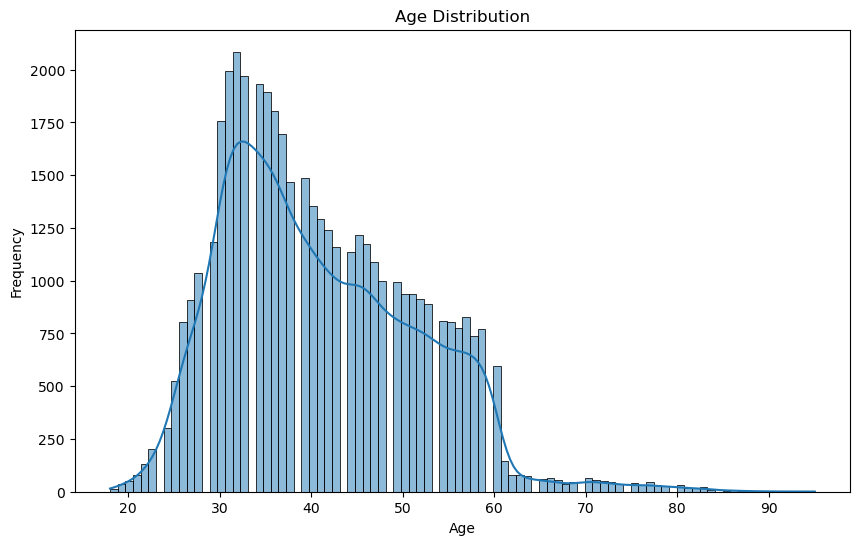

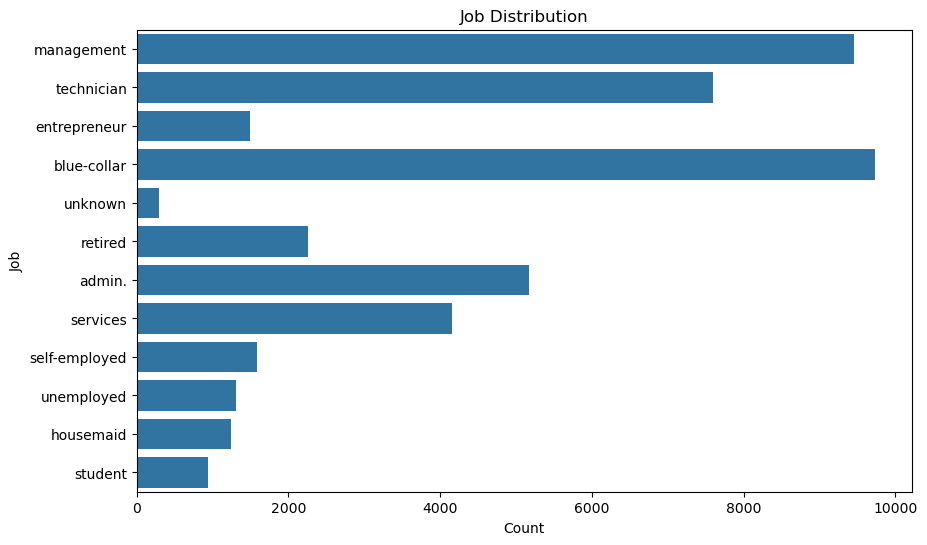

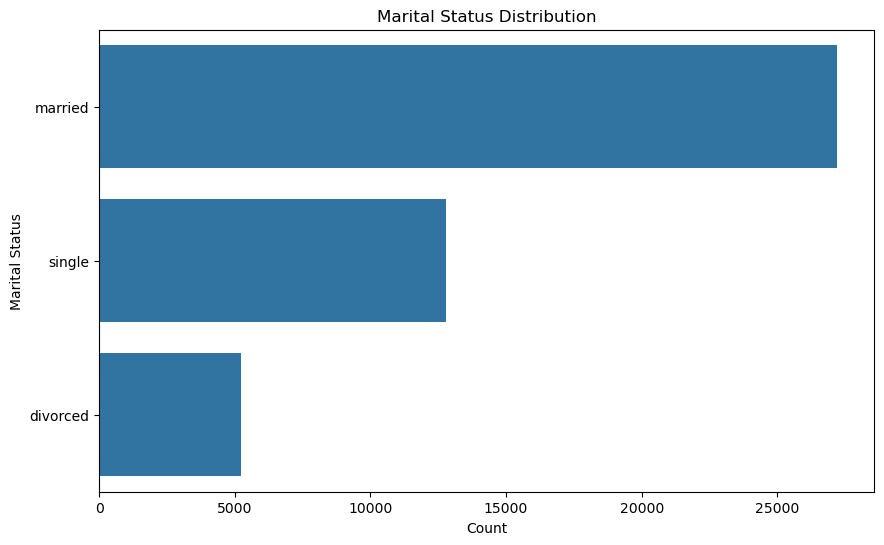

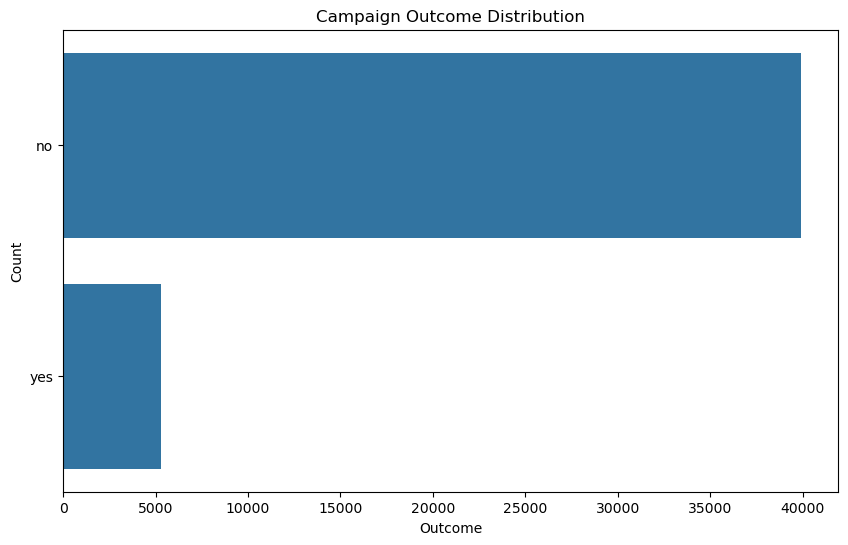

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Job distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=data)
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

# Marital status distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='marital', data=data)
plt.title('Marital Status Distribution')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.show()

# Outcome distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['y'])
plt.title('Campaign Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


Conversion Rate: 11.70%
job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: yes, dtype: float64


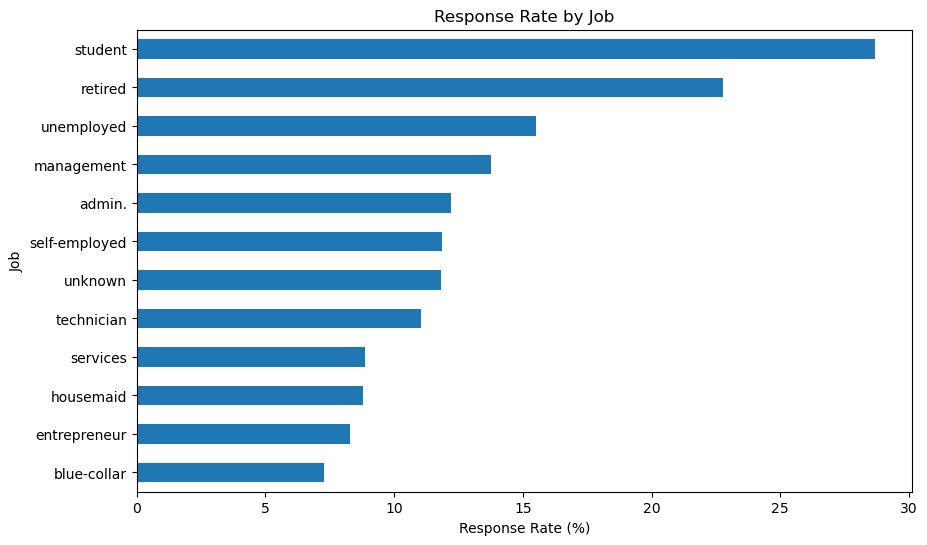

In [6]:
# Conversion rate: Percentage of customers who accepted the offer
conversion_rate = data['y'].value_counts(normalize=True)['yes'] * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

# Response rate by job
response_rate_job = data.groupby('job')['y'].value_counts(normalize=True).unstack()['yes'] * 100
print(response_rate_job)

# Plot response rate by job
plt.figure(figsize=(10, 6))
response_rate_job.sort_values().plot(kind='barh')
plt.title('Response Rate by Job')
plt.xlabel('Response Rate (%)')
plt.ylabel('Job')
plt.show()


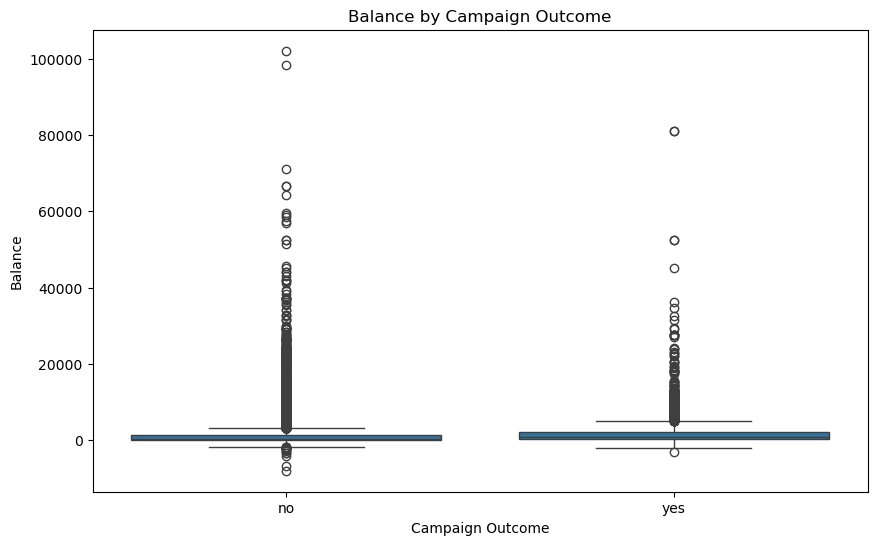

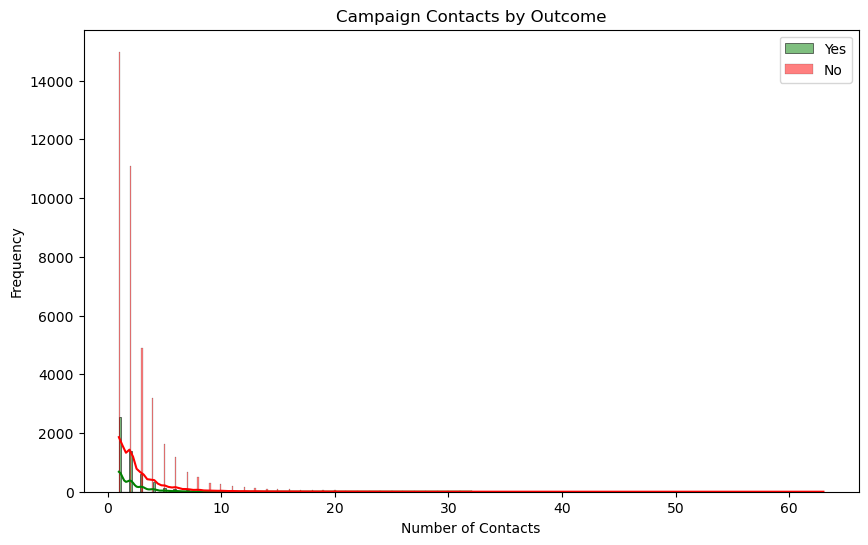

In [7]:
# Box plot of balance by campaign outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=data)
plt.title('Balance by Campaign Outcome')
plt.xlabel('Campaign Outcome')
plt.ylabel('Balance')
plt.show()

# Histogram of campaign contacts by outcome
plt.figure(figsize=(10, 6))
sns.histplot(data[data['y'] == 'yes']['campaign'], color='green', label='Yes', kde=True)
sns.histplot(data[data['y'] == 'no']['campaign'], color='red', label='No', kde=True)
plt.title('Campaign Contacts by Outcome')
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
plt.legend()
plt.show()
